# Лабораторная работа №2

## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
   * обработку пропусков в данных;
   * кодирование категориальных признаков;
   * масштабирование данных.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

In [65]:
# Будем использовать только обучающую выборку
data = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')

In [66]:
# размер набора данных
data.shape

(6482, 15)

In [67]:
# типы колонок
data.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
link                       object
country                    object
city                       object
region                     object
logo                       object
type                       object
research_output            object
student_faculty_ratio     float64
international_students     object
size                       object
faculty_count              object
dtype: object

In [68]:
# проверим есть ли пропущенные значения
data.isnull().sum()

university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64

In [69]:
# Первые 5 строк датасета
data.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [70]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6482


### Обработка пропусков в данных

In [71]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6482, 15), (6482, 6))

In [72]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6482, 15), (2716, 15))

In [73]:
data.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [74]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


### Обработка пропусков и числовых данных

In [75]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка score. Тип данных float64. Количество пустых значений 3662, 56.49%.
Колонка student_faculty_ratio. Тип данных float64. Количество пустых значений 75, 1.16%.


In [76]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,score,student_faculty_ratio
0,100.0,4.0
1,98.7,3.0
2,98.3,5.0
3,97.2,4.0
4,96.9,2.0
...,...,...
6477,NaN,17.0
6478,NaN,8.0
6479,NaN,31.0
6480,NaN,20.0


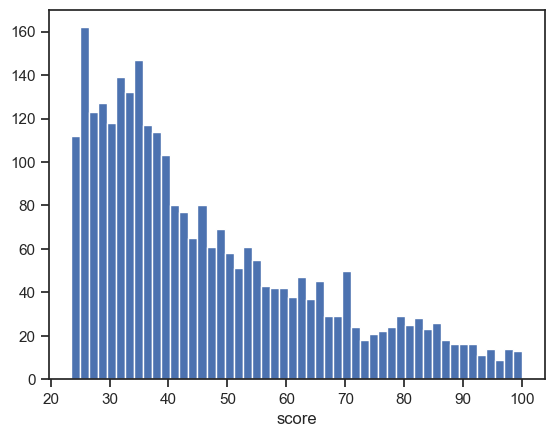

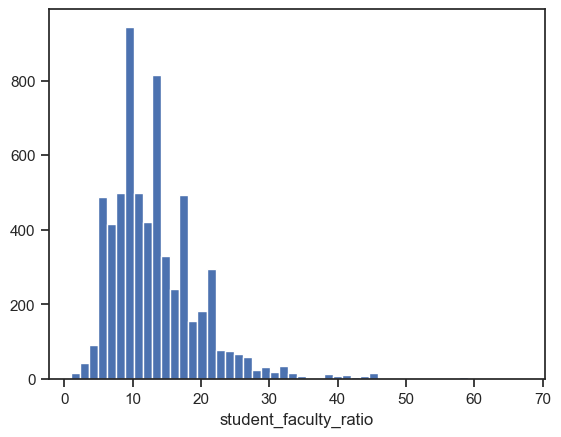

In [77]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

### Обработка пропусков в категориальных данных

In [78]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка rank_display. Тип данных object. Количество пустых значений 68, 1.05%.
Колонка city. Тип данных object. Количество пустых значений 178, 2.75%.
Колонка type. Тип данных object. Количество пустых значений 12, 0.19%.
Колонка research_output. Тип данных object. Количество пустых значений 2, 0.03%.
Колонка international_students. Тип данных object. Количество пустых значений 164, 2.53%.
Колонка size. Тип данных object. Количество пустых значений 2, 0.03%.
Колонка faculty_count. Тип данных object. Количество пустых значений 78, 1.2%.


In [79]:
cat_temp_data = data[['research_output']]
cat_temp_data.head()

,research_output
0,Very High
1,Very High
2,Very High
3,Very high
4,Very High


In [80]:
cat_temp_data['research_output'].unique()

array(['Very High', 'Very high', 'High', 'Medium', 'Low', nan],
      dtype=object)

In [81]:
cat_temp_data[cat_temp_data['research_output'].isnull()].shape

(2, 1)

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [83]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Very High'],
       ['Very High'],
       ['Very High'],
       ...,
       ['Medium'],
       ['High'],
       ['High']], dtype=object)

In [84]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['High', 'Low', 'Medium', 'Very High', 'Very high'], dtype=object)

In [85]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Very High'],
       ['Very High'],
       ['Very High'],
       ...,
       ['Medium'],
       ['High'],
       ['High']], dtype=object)

In [86]:
np.unique(data_imp3)

array(['High', 'Low', 'Medium', 'NA', 'Very High', 'Very high'],
      dtype=object)

In [87]:
data_imp3[data_imp3=='NA'].size

2

### Преобразование категориальных признаков в числовые

In [88]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Very High
1,Very High
2,Very High
3,Very high
4,Very High
...,...
6477,High
6478,Very High
6479,Medium
6480,High


### Кодирование категорий целочисленными значениями
Использование LabelEncoder

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
cat_enc['c1'].unique()

array(['Very High', 'Very high', 'High', 'Medium', 'Low'], dtype=object)

In [91]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [92]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['High', 'Low', 'Medium', 'Very High', 'Very high'], dtype=object)

In [93]:
cat_enc_le

array([3, 3, 3, ..., 2, 0, 0])

In [94]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

In [95]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['High', 'Low', 'Medium', 'Very High'], dtype=object)

Использование OrdinalEncoder

In [96]:
from sklearn.preprocessing import OrdinalEncoder

In [97]:
data_oe = data[['rank_display', 'faculty_count', 'type']]
data_oe.head()

,rank_display,faculty_count,type
0,1,"3,065",Private
1,2,"4,725",Private
2,3,"4,646",Private
3,4,"5,800",Public
4,5,968,Private


In [98]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['1', '3,065', 'Private'],
       ['2', '4,725', 'Private'],
       ['3', '4,646', 'Private'],
       ...,
       ['1201', '1,113', 'Public'],
       ['1201', '1,688', 'Public'],
       ['1201', '5,871', 'Public']], dtype=object)

In [99]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[  0., 666.,   1.],
       [114., 831.,   1.],
       [225., 827.,   1.],
       ...,
       [ 27.,  29.,   2.],
       [ 27., 156.,   2.],
       [ 27., 901.,   2.]])

### Кодирование категорий наборами бинарных значений
В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [102]:
cat_enc.shape

(6482, 1)

In [103]:
cat_enc_ohe.shape

(6482, 5)

In [104]:
cat_enc_ohe

<6482x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6482 stored elements in Compressed Sparse Row format>

In [105]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])

In [106]:
cat_enc.head(10)

,c1
0,Very High
1,Very High
2,Very High
3,Very high
4,Very High
5,Very High
6,Very High
7,Very High
8,Very High
9,Very High


### Pandas get_dummies - быстрый вариант one-hot кодирования

In [107]:
pd.get_dummies(cat_enc).head()

,c1_High,c1_Low,c1_Medium,c1_Very High,c1_Very high
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0


In [108]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,research_output_High,research_output_Low,research_output_Medium,research_output_Very High,research_output_Very high,research_output_nan
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


### Масштабирование данных
Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

MinMax масштабирование

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [113]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['score']])

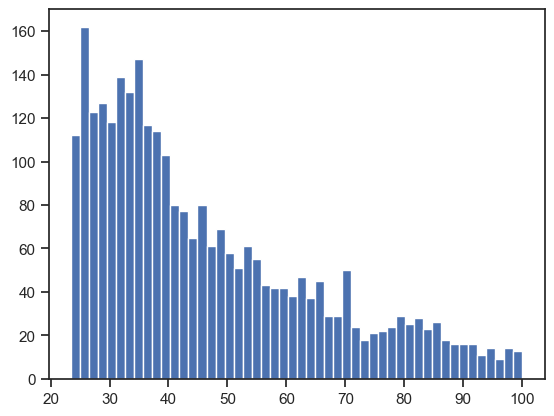

In [114]:
plt.hist(data['score'], 50)
plt.show()

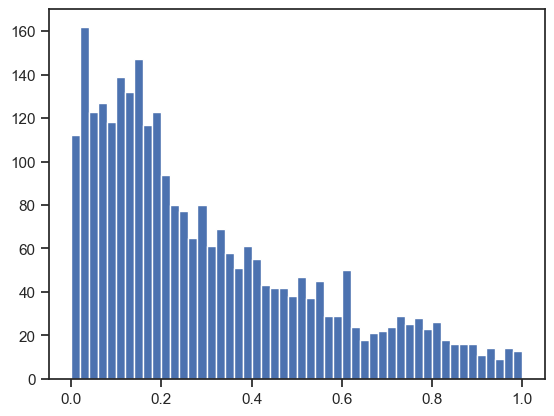

In [115]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [116]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['score']])

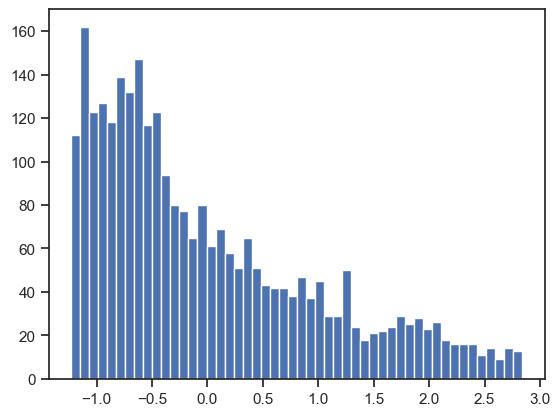

In [61]:
plt.hist(sc2_data, 50)
plt.show()